In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.subplots as make_subplots 
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , accuracy_score
from sklearn.model_selection import GridSearchCV 


import warnings
warnings.filterwarnings("ignore")      

In [ ]:
teleco_df = pd.read_csv("Data/Telco-Customer-Churn.csv")

In [ ]:
teleco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
teleco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
pd.concat({"Unique Values" : teleco_df.apply(pd.unique) , "Counts" : teleco_df.nunique()} , axis=1)

,Unique Values,Counts
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
gender,"[Female, Male]",2
SeniorCitizen,"[0, 1]",2
Partner,"[Yes, No]",2
Dependents,"[No, Yes]",2
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
PhoneService,"[No, Yes]",2
MultipleLines,"[No phone service, No, Yes]",3
InternetService,"[DSL, Fiber optic, No]",3
OnlineSecurity,"[No, Yes, No internet service]",3


* gereksiz kolonun atılması
* removal of unnecessary colon

In [ ]:
teleco_df.drop("customerID" , axis=1 , inplace=True)

In [ ]:
teleco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
teleco_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
teleco_df["TotalCharges"] = pd.to_numeric(teleco_df["TotalCharges"] , errors="coerce")
teleco_df["TotalCharges"] = teleco_df["TotalCharges"].fillna(0)

In [ ]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Eda

* Churnn değerini görselleştirmede daha rahat anlaşılması için şimdilik remained ve left olarak değiştirelim
* For now, let's leave the Churnn value for easier understanding in visualization and change it to the left.

In [ ]:
Churn_map = {
    "Yes" : "Left" , 
    "No" : "Remained"
}

teleco_df["Churn"] = teleco_df["Churn"].map(Churn_map)

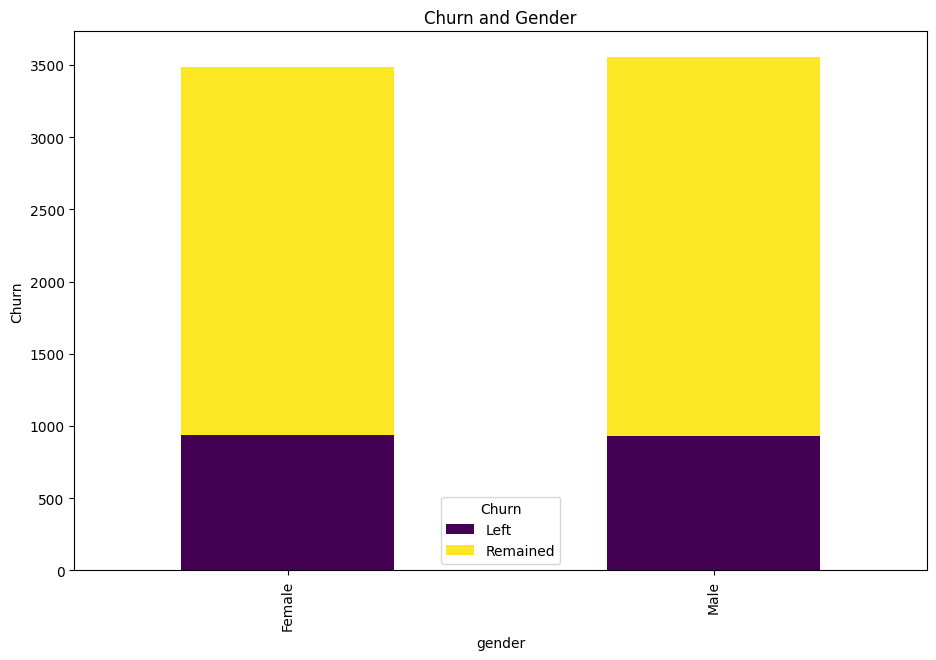

In [ ]:
gender_and_churn = teleco_df.groupby("gender")["Churn"].value_counts().unstack()
gender_and_churn.plot(kind="bar" , figsize=(11,7) , stacked=True , colormap= "viridis")
plt.title("Churn and Gender")
plt.ylabel("Churn")
plt.show()

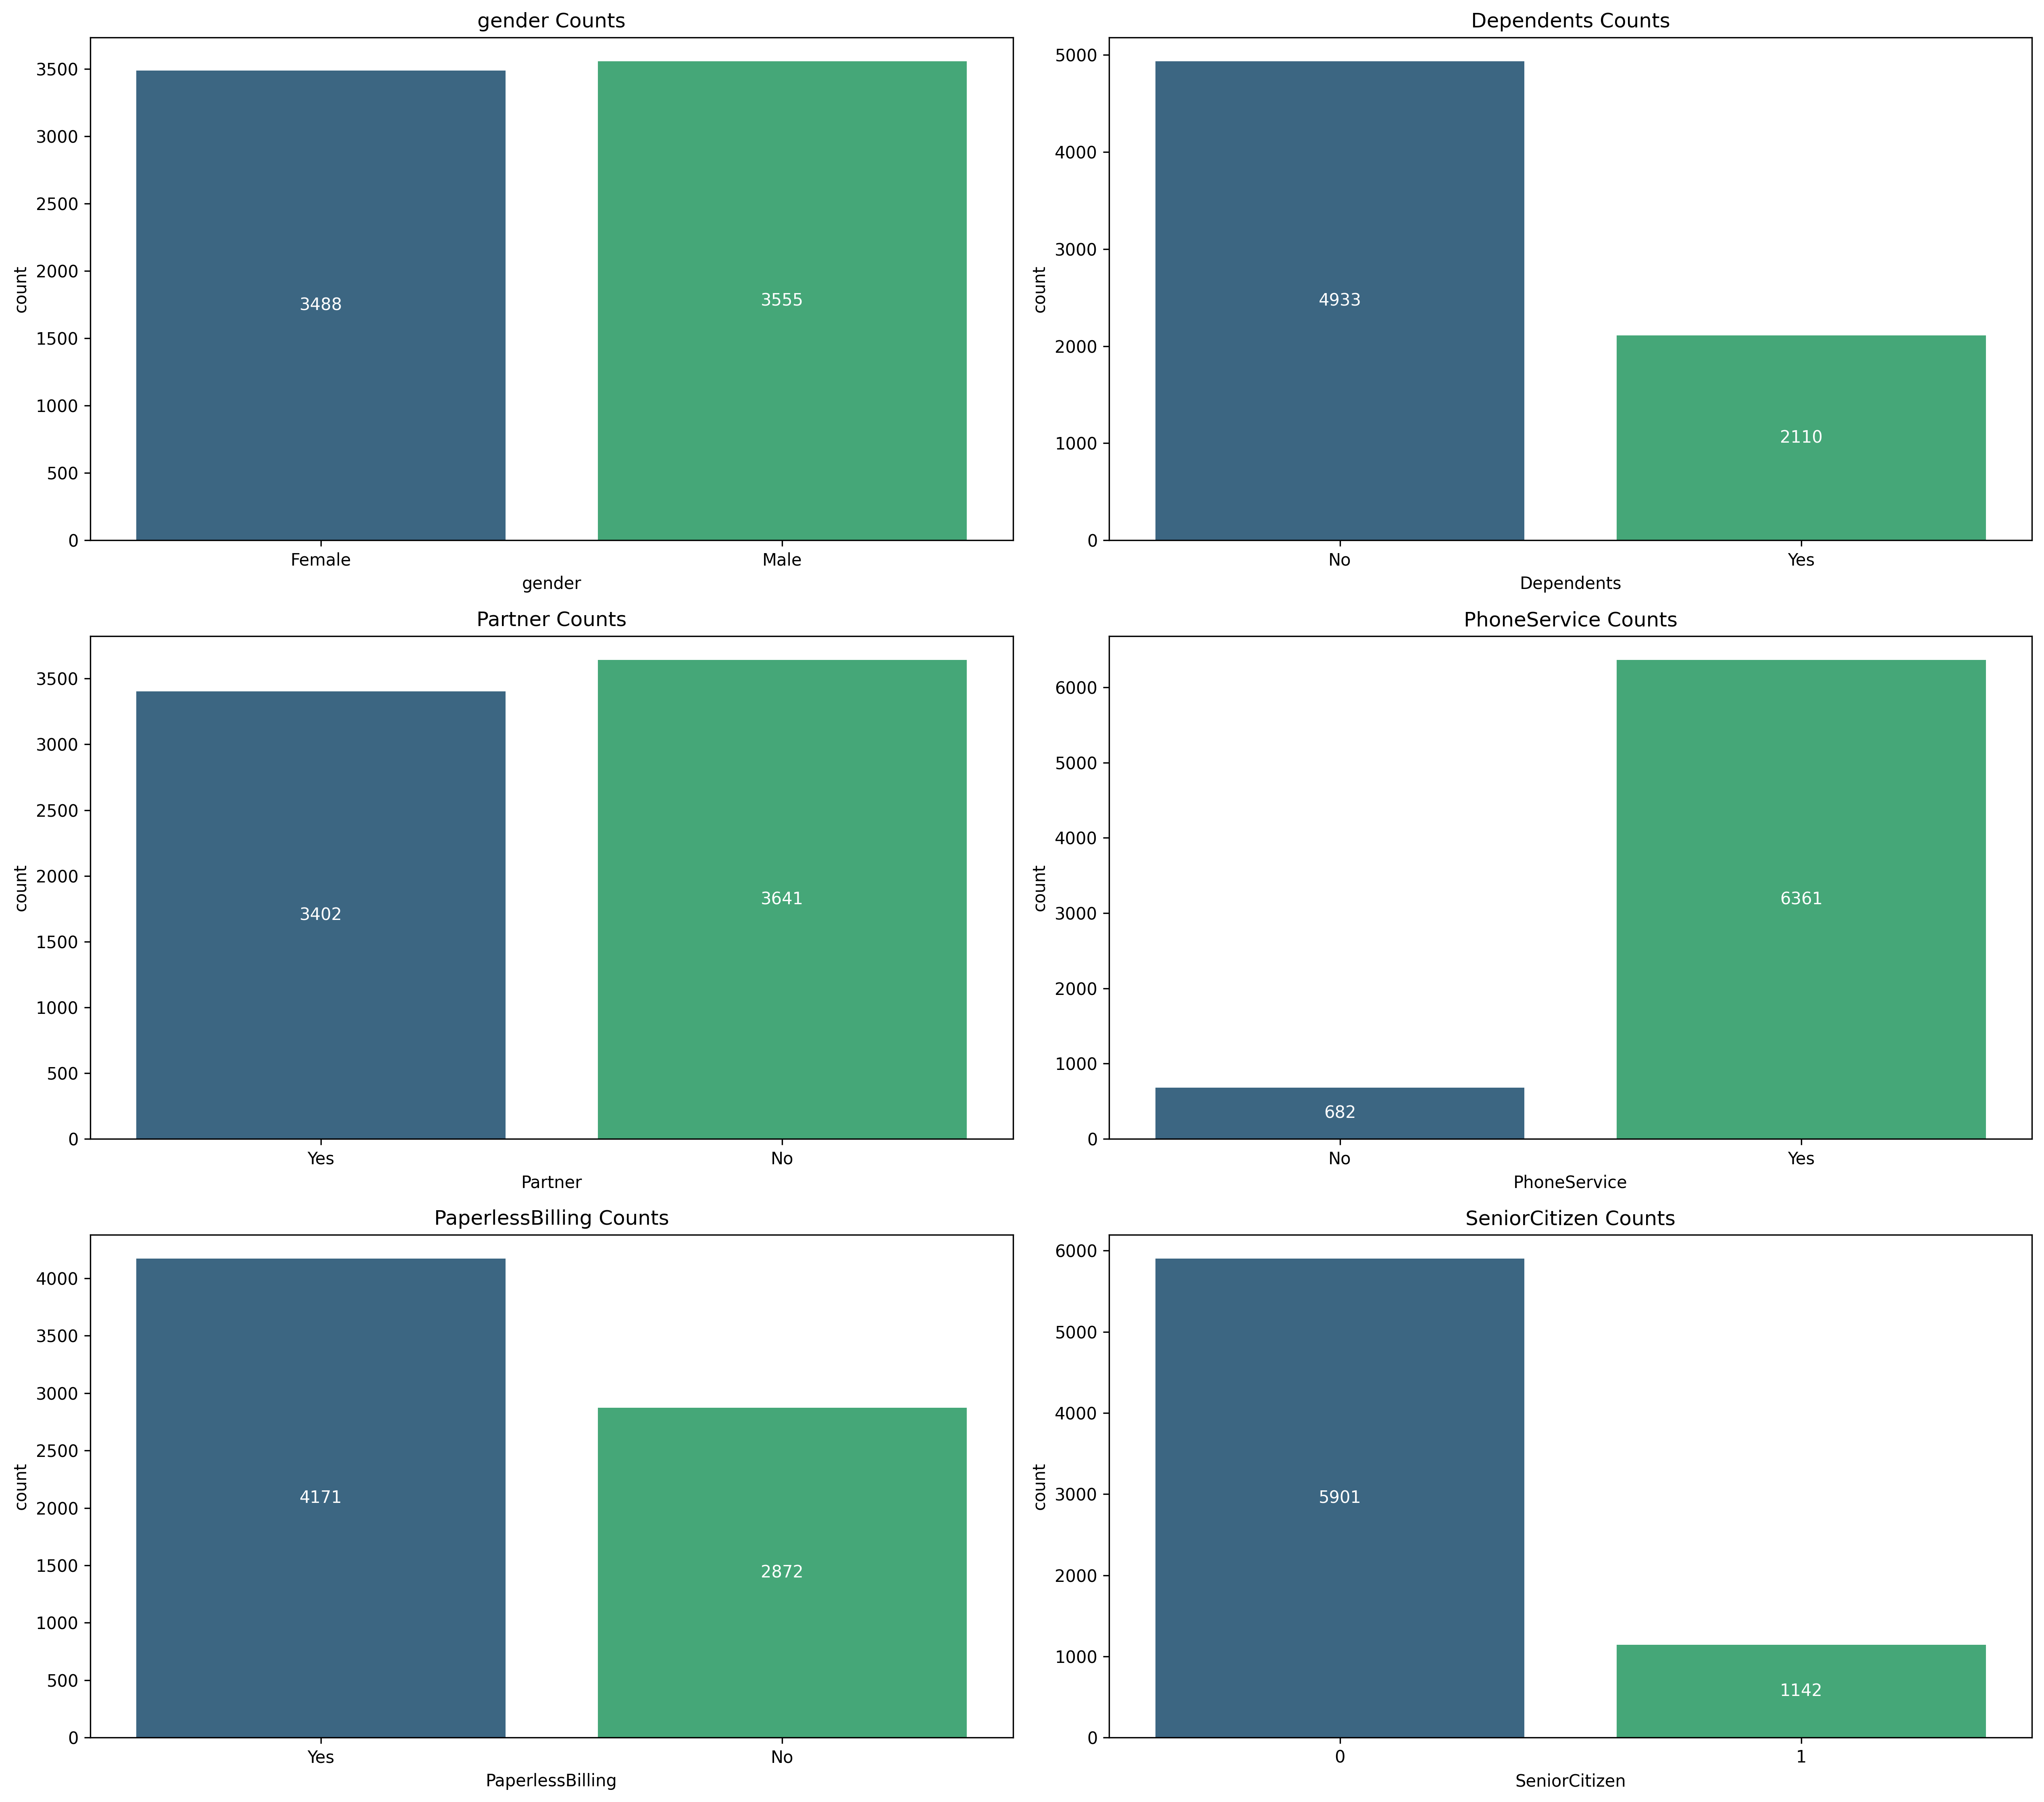

In [ ]:
def count_plot(data , palette):
    plt.figure(figsize=(17,15) , dpi=300)

    for i , feature in enumerate(data.columns):
        plt.subplot(3,2 , i+1)


        ax = sns.countplot(x=feature , data=data , palette=palette)

        for bar in ax.containers:
            ax.bar_label(bar , label_type="center" , color = "white")

        plt.title(f"{feature} Counts")

    plt.tight_layout()
    plt.show()

count_plot(teleco_df[["gender","Dependents", "Partner", "PhoneService", "PaperlessBilling" , "SeniorCitizen"]], palette="viridis")


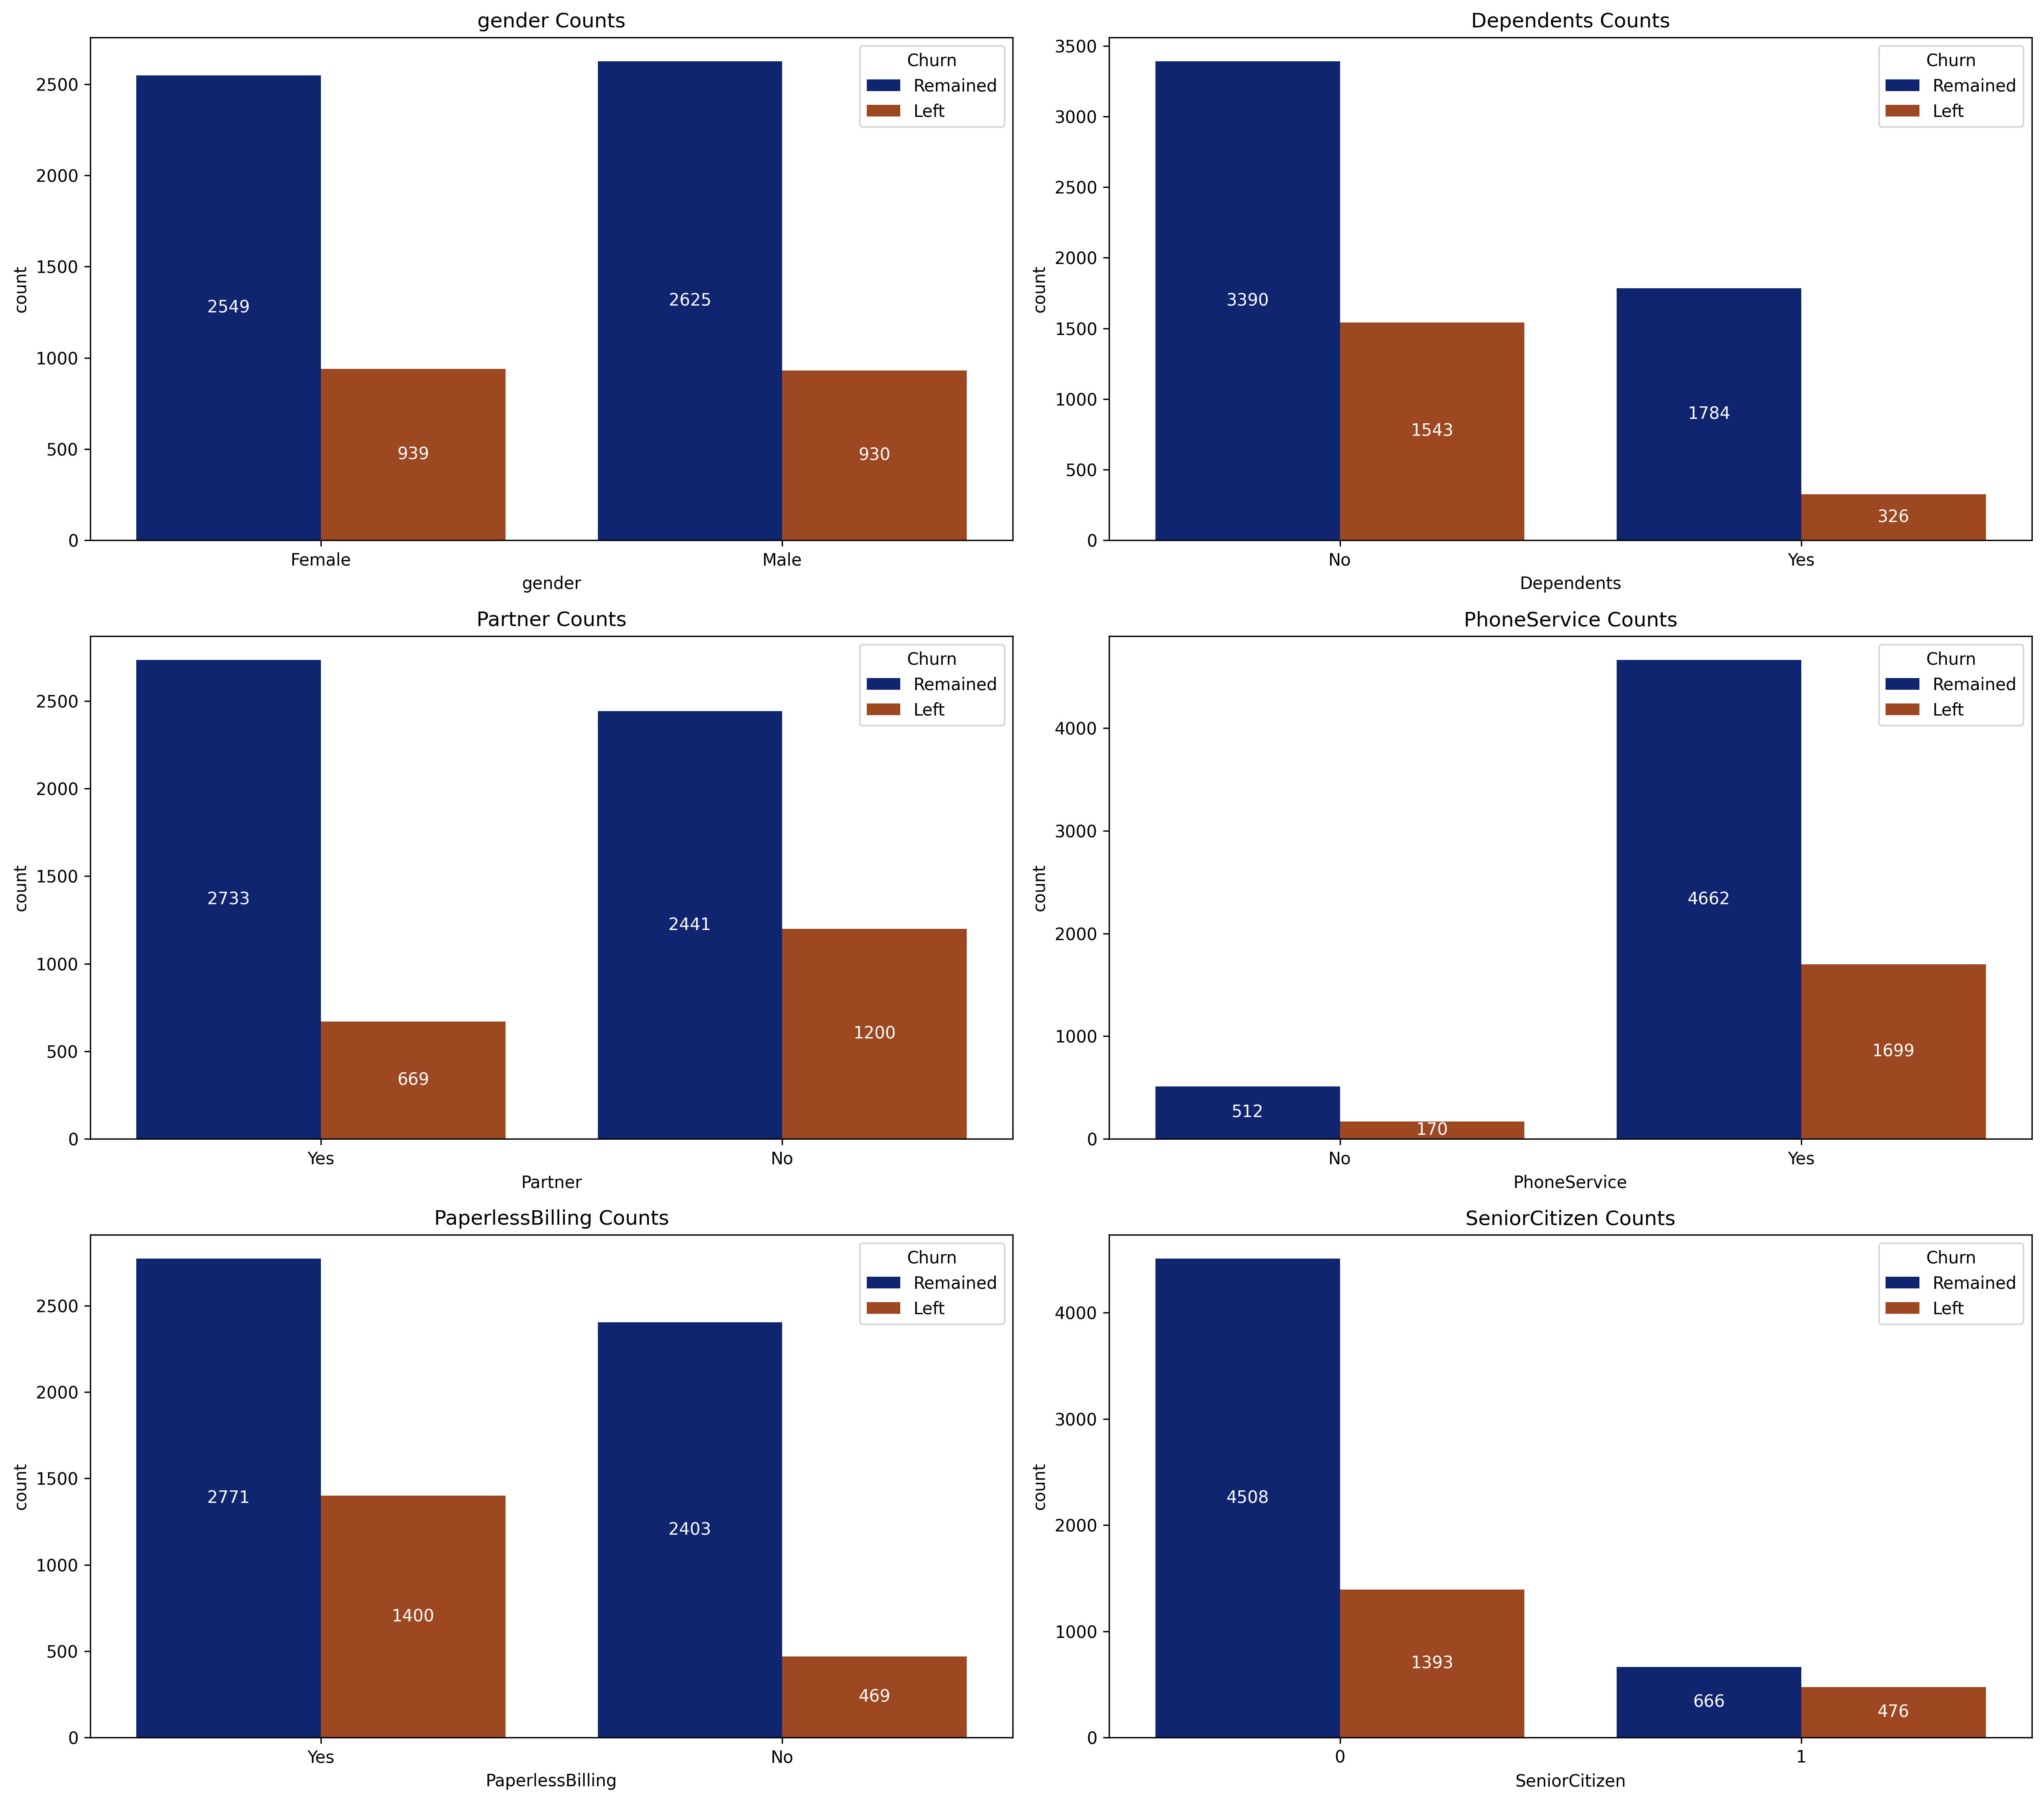

In [ ]:
def dual_count_plot(data , palette):
    plt.figure(figsize=(17,15) , dpi=300)

    for i , feature in enumerate(data.columns):
        plt.subplot(3,2 , i+1)


        ax = sns.countplot(x=feature , data=data ,hue= teleco_df["Churn"],palette=palette)

        for bar in ax.containers:
            ax.bar_label(bar , label_type="center" , color = "white")

        plt.title(f"{feature} Counts")

    plt.tight_layout()
    plt.show()

dual_count_plot(teleco_df[["gender" ,"Dependents", "Partner", "PhoneService", "PaperlessBilling" , "SeniorCitizen"]], palette="dark")

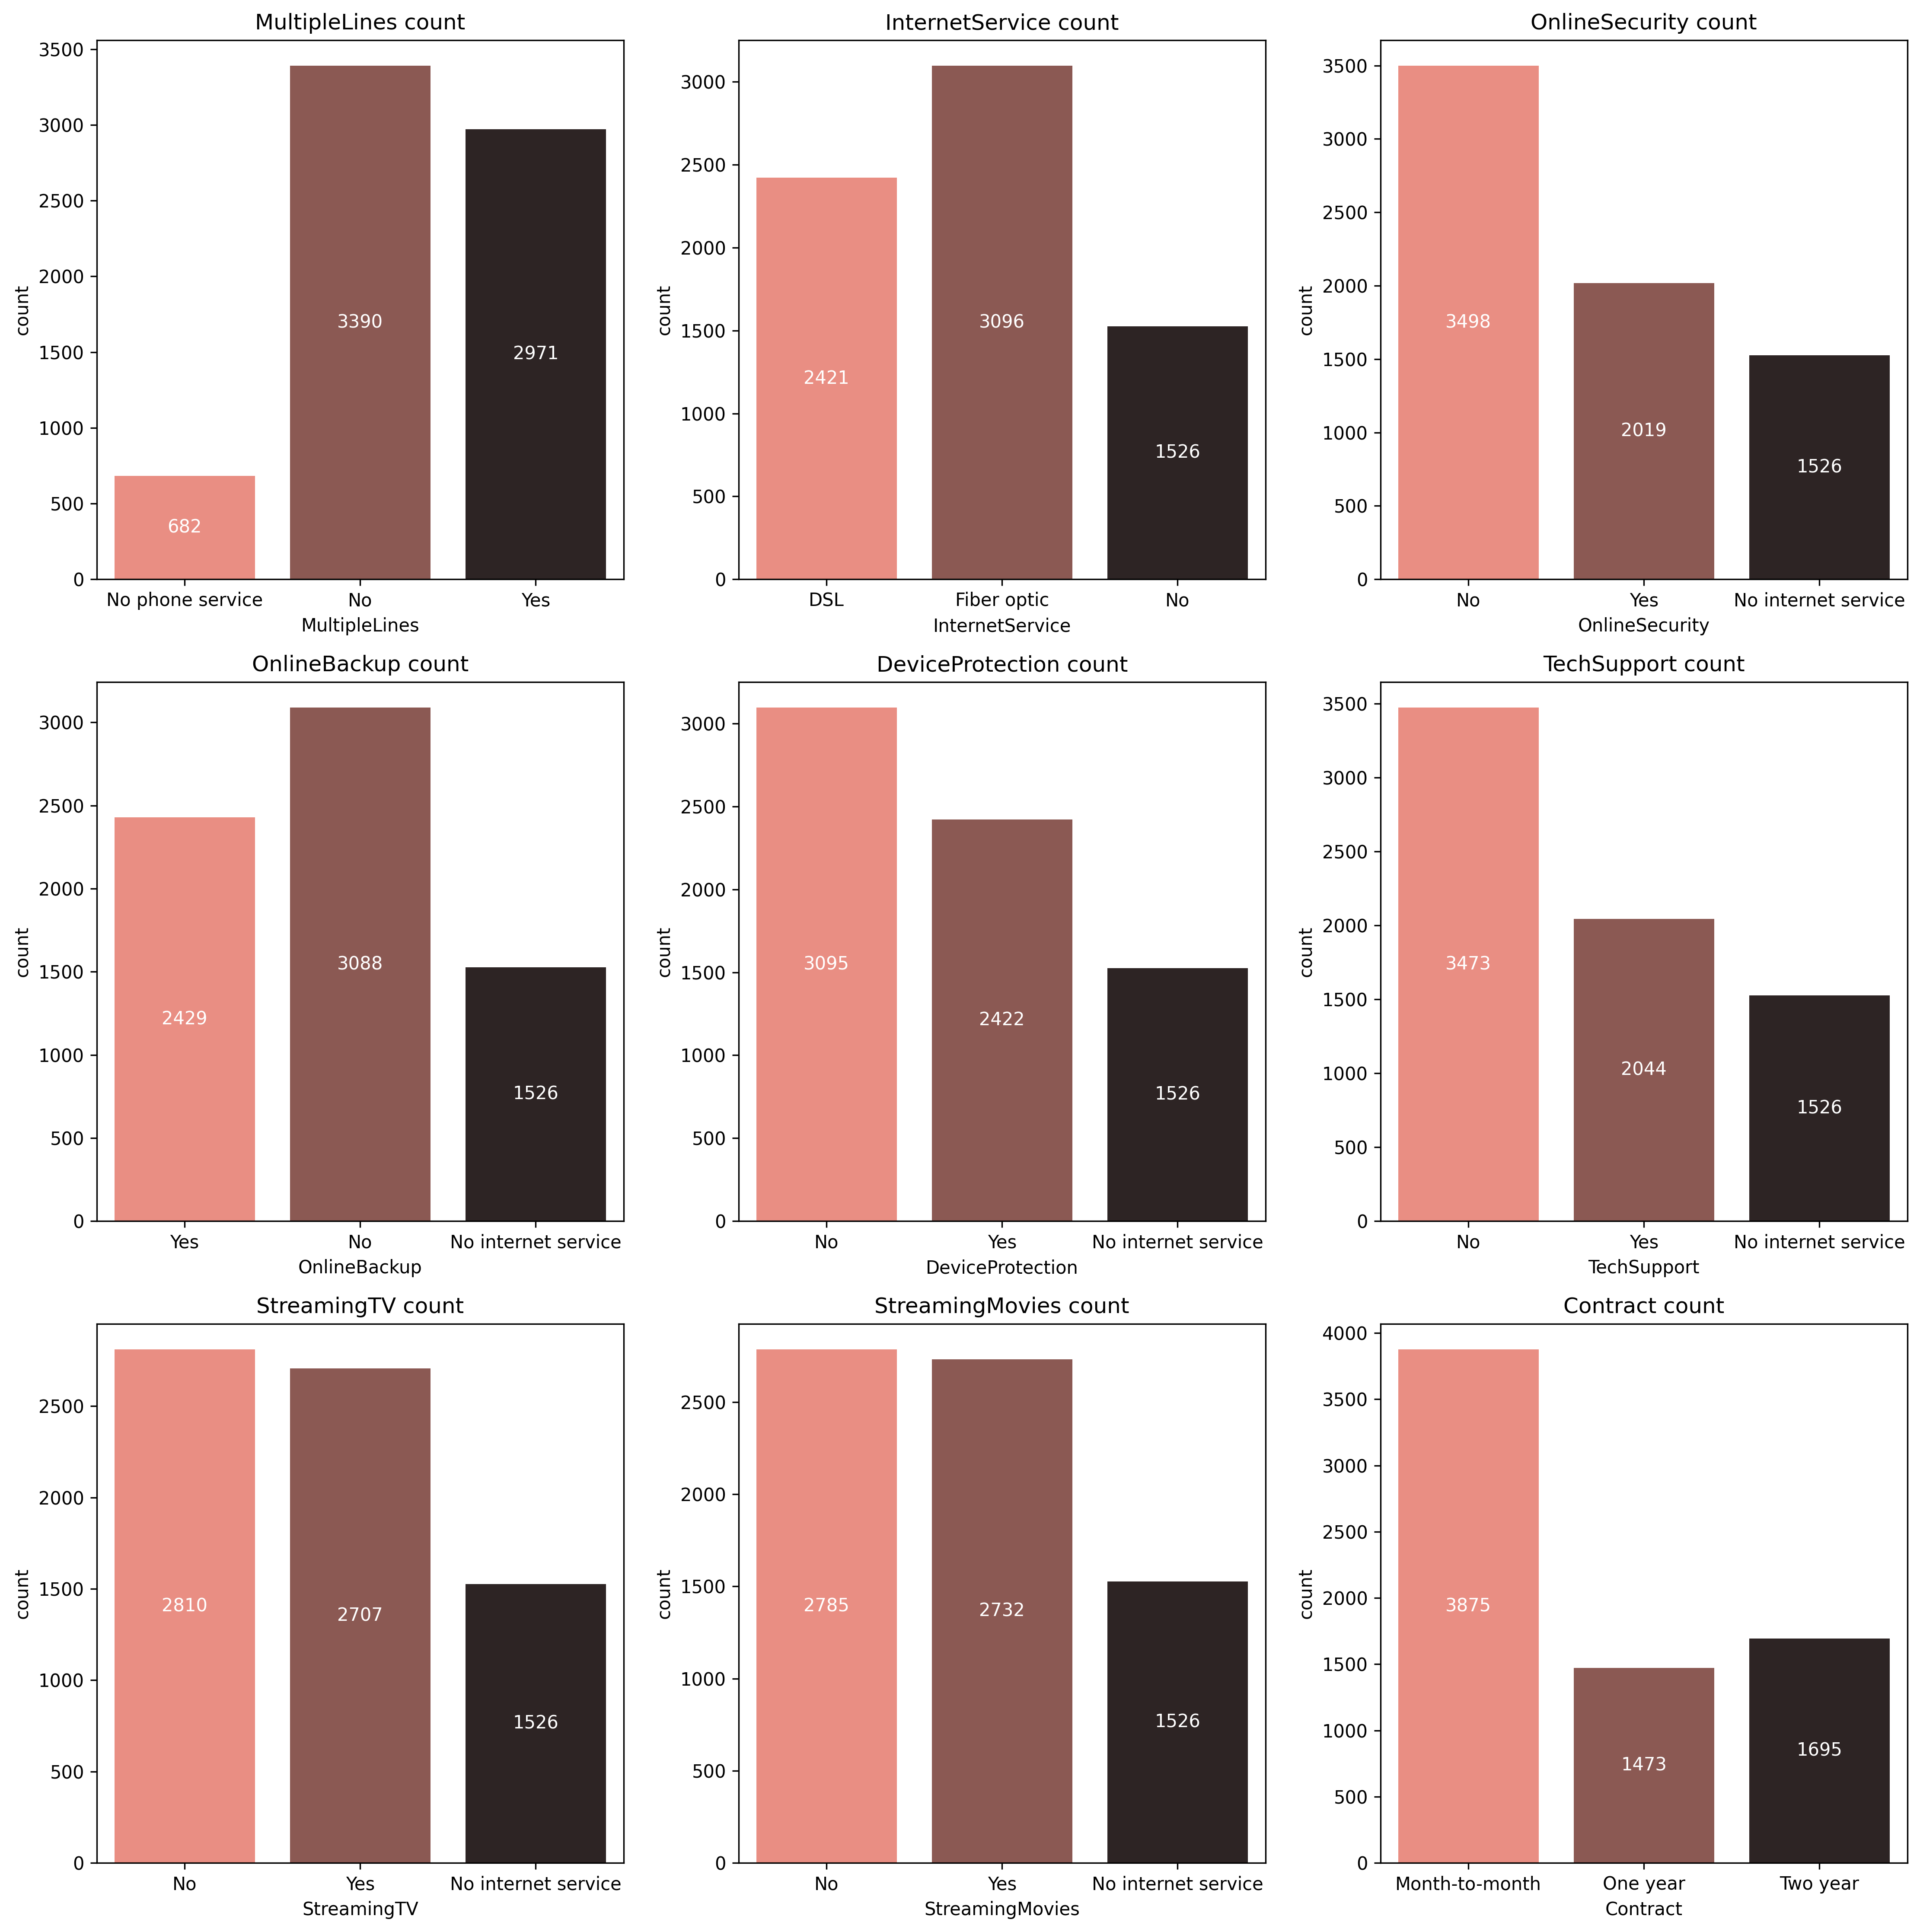

In [ ]:
def triple_count_plot(data , palette):
    plt.figure(figsize=(15,15) , dpi=300)

    for i , feature in enumerate(data):
        plt.subplot(3,3, i+1 )

        ax = sns.countplot(x=feature ,data=data , palette=palette)

        for box in ax.containers:
            ax.bar_label(box , label_type="center" , color="white")

        plt.title(f"{feature} count")

    plt.tight_layout()
    plt.show()

triple_count_plot(teleco_df[["MultipleLines" , "InternetService" , "OnlineSecurity" , "OnlineBackup" , "DeviceProtection" , "TechSupport" , "StreamingTV" , "StreamingMovies" , "Contract"]] , palette="dark:salmon_r")


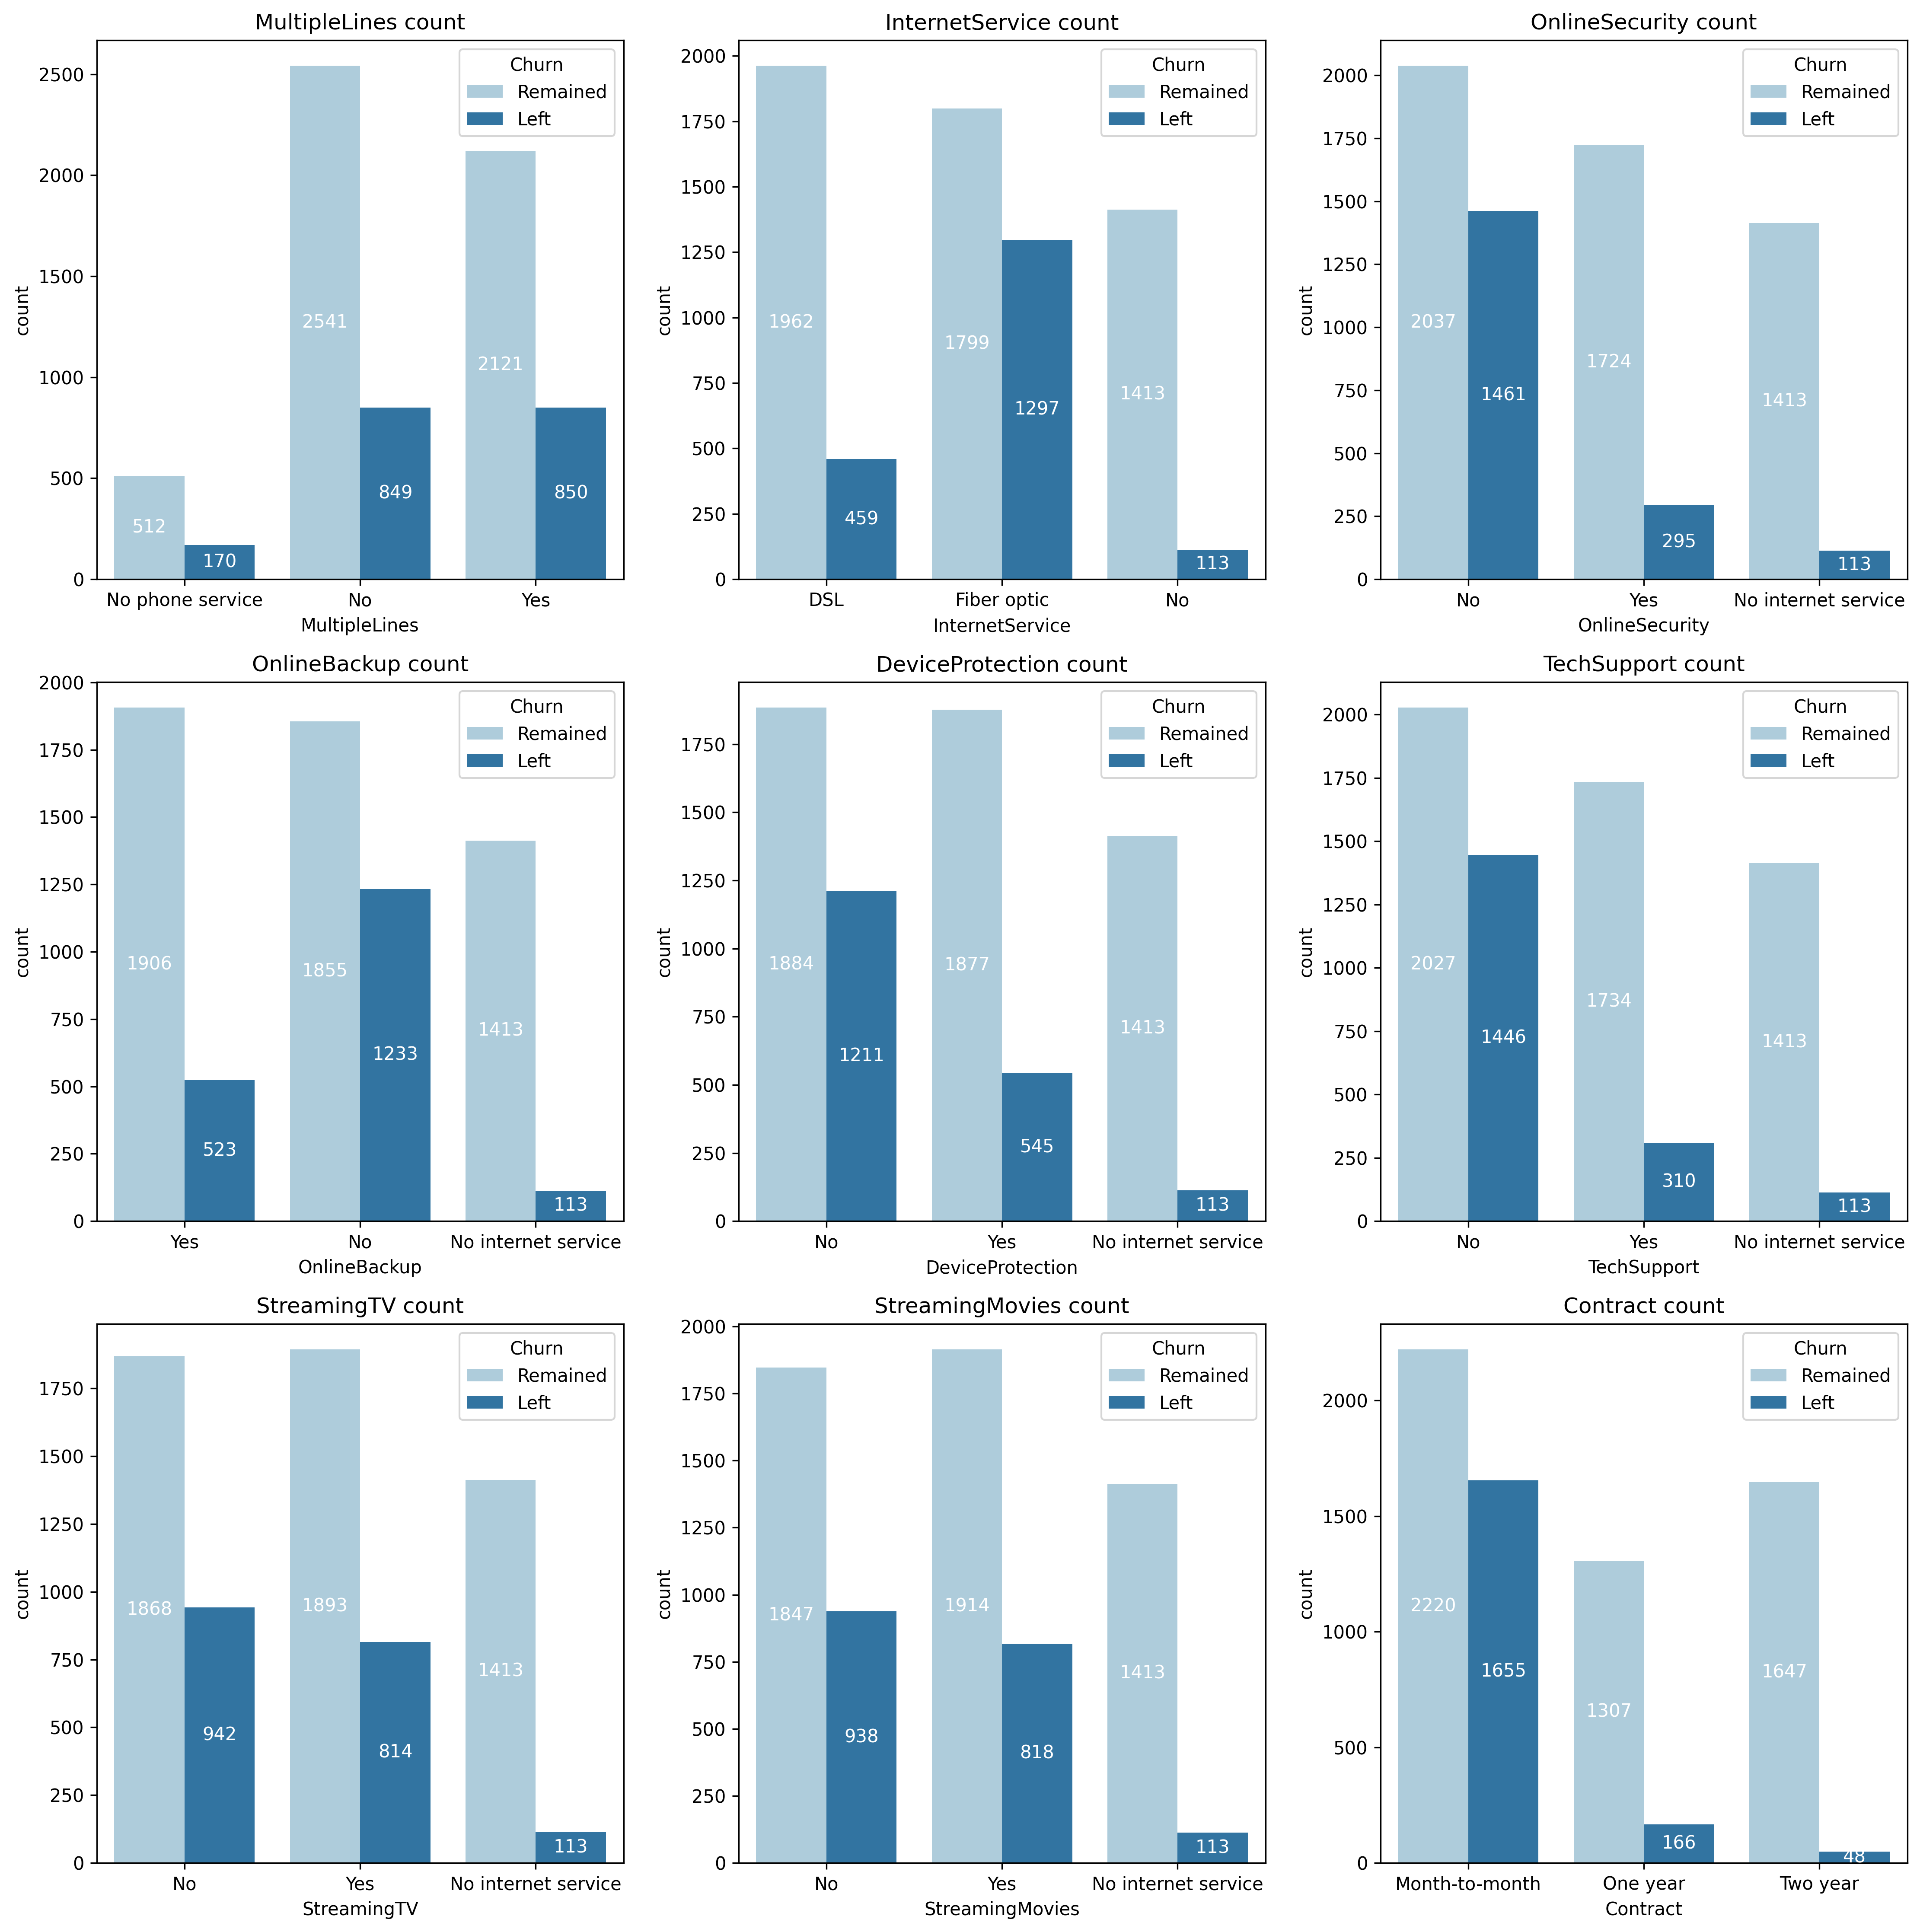

In [ ]:
def triple_count_plot(data , palette):
    plt.figure(figsize=(15,15) , dpi=300)

    for i , feature in enumerate(data):
        plt.subplot(3,3, i+1 )

        ax = sns.countplot(x=feature ,data=data , hue=teleco_df["Churn"] , palette=palette)

        for box in ax.containers:
            ax.bar_label(box , label_type="center" ,  color="white")

        plt.title(f"{feature} count")

    plt.tight_layout()
    plt.show()

triple_count_plot(teleco_df[["MultipleLines" , "InternetService" , "OnlineSecurity" , "OnlineBackup" , "DeviceProtection" , "TechSupport" , "StreamingTV" , "StreamingMovies" , "Contract"]] , palette="Paired")

In [ ]:
fig = px.pie(
    teleco_df , 
    names="PaymentMethod" , 
    color_discrete_sequence=["#690B22" ,"#E07A5F" ,"#F1E3D3" ,"#1B4D3E"] , 
    title="Paymet Method Rates"

)

fig.update_traces(textinfo="label + percent")

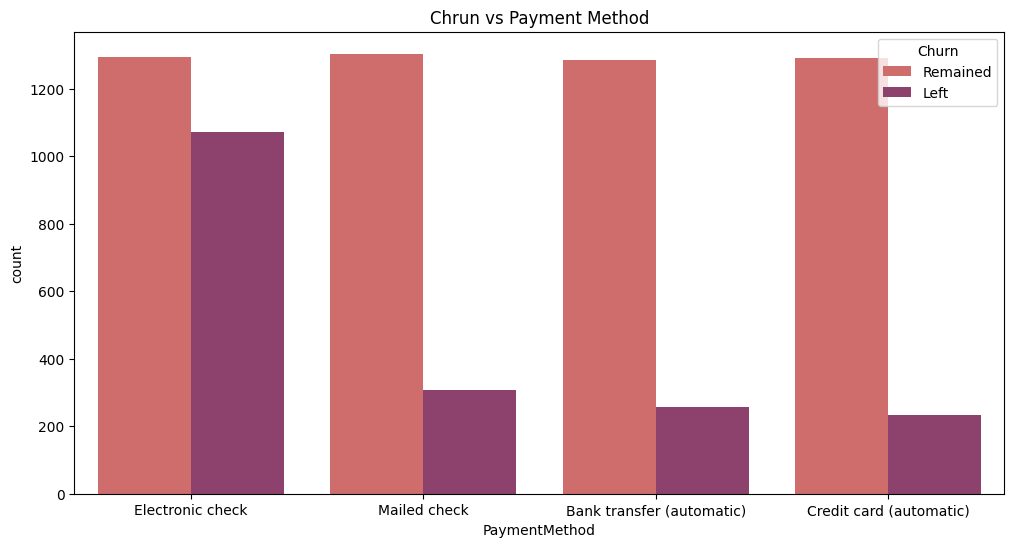

In [ ]:
plt.figure(figsize=(12,6))

sns.countplot(x = teleco_df["PaymentMethod"] , hue="Churn" ,data=teleco_df , palette="flare")
plt.title("Chrun vs Payment Method")
plt.show()


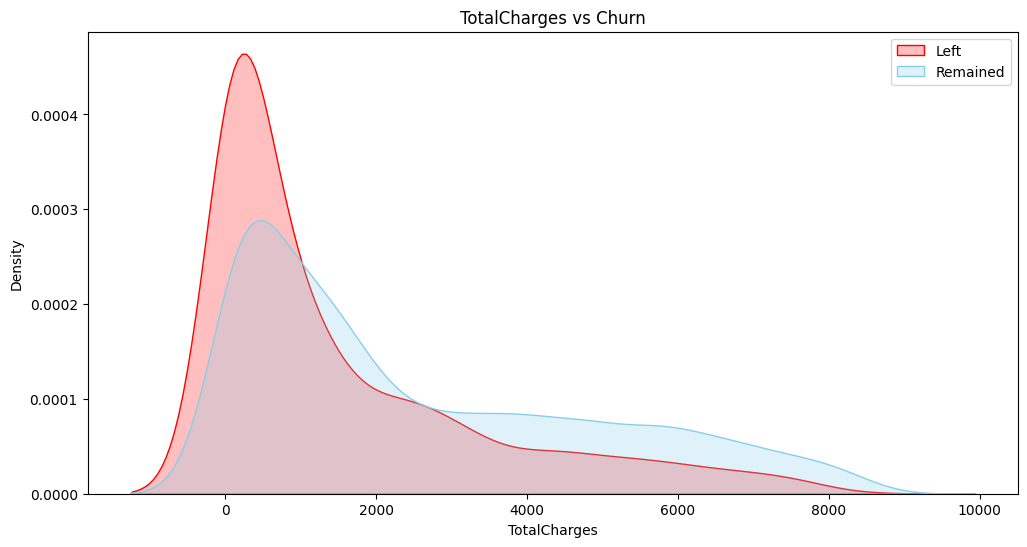

In [ ]:
plt.figure(figsize=(12,6))

left_churn = teleco_df[teleco_df["Churn"] == "Left"]
remained_churn = teleco_df[teleco_df["Churn"] == "Remained"]

sns.kdeplot(left_churn["TotalCharges"] , fill=True , label="Left" , color="red")
sns.kdeplot(remained_churn["TotalCharges"] , fill=True , label = "Remained" , color="skyblue")
plt.title("TotalCharges vs Churn")

plt.legend()
plt.show()

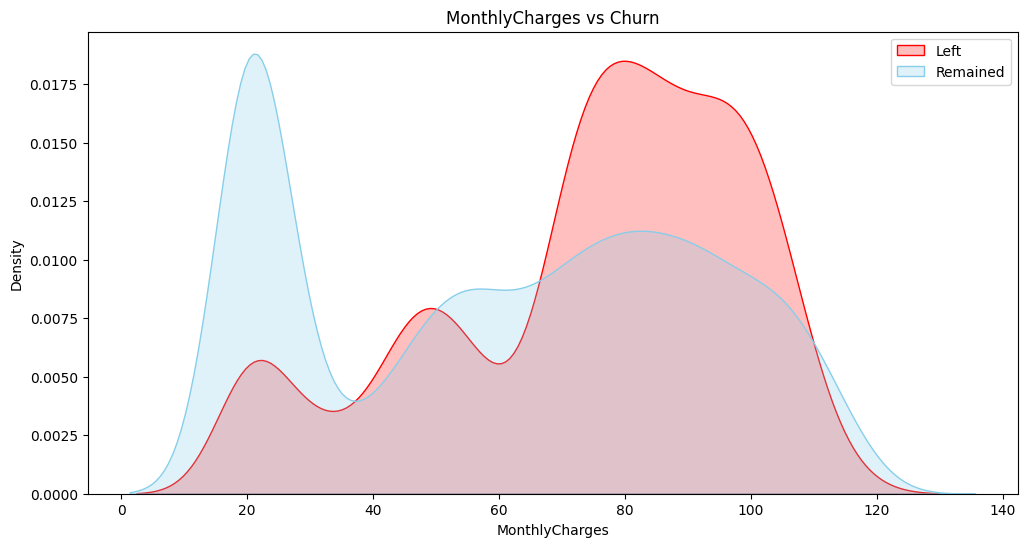

In [ ]:
plt.figure(figsize=(12,6))

sns.kdeplot(left_churn["MonthlyCharges"] , fill=True , label="Left" , color="red")
sns.kdeplot(remained_churn["MonthlyCharges"] , fill=True , label = "Remained" , color="skyblue")
plt.title("MonthlyCharges vs Churn")

plt.legend()
plt.show()

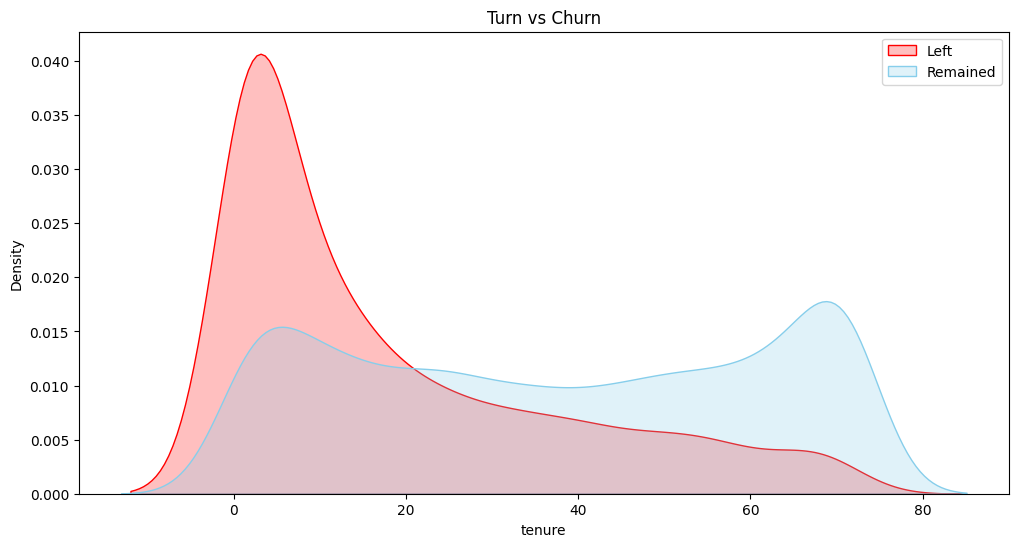

In [ ]:
plt.figure(figsize=(12,6))

sns.kdeplot(left_churn["tenure"] , fill=True , label="Left" , color="red")
sns.kdeplot(remained_churn["tenure"] , fill=True , label = "Remained" , color="skyblue")
plt.title("Turn vs Churn")

plt.legend()
plt.show()

#### Encoding

In [ ]:
Churn_map2 = {
    "Left" : 1 , 
    "Remained" : 0
}

teleco_df["Churn"] = teleco_df["Churn"].map(Churn_map2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = teleco_df["Churn"]
X = teleco_df.drop("Churn" , axis=1)

In [ ]:
label_encoded = {}

for i in X.select_dtypes("object").columns:

    label = LabelEncoder()
    X[i] = label.fit_transform(X[i])
    label_encoded[i] = label 


* Encode Edilen kolonlar ve Değerleri
* Encoded columns and their values

In [ ]:
for col, le in label_encoded.items():
    print(f"Kolon: {col}")

    for i, category in enumerate(le.classes_):
        print(f"{category}: {i}") 

Kolon: gender
Female: 0
Male: 1
Kolon: Partner
No: 0
Yes: 1
Kolon: Dependents
No: 0
Yes: 1
Kolon: PhoneService
No: 0
Yes: 1
Kolon: MultipleLines
No: 0
No phone service: 1
Yes: 2
Kolon: InternetService
DSL: 0
Fiber optic: 1
No: 2
Kolon: OnlineSecurity
No: 0
No internet service: 1
Yes: 2
Kolon: OnlineBackup
No: 0
No internet service: 1
Yes: 2
Kolon: DeviceProtection
No: 0
No internet service: 1
Yes: 2
Kolon: TechSupport
No: 0
No internet service: 1
Yes: 2
Kolon: StreamingTV
No: 0
No internet service: 1
Yes: 2
Kolon: StreamingMovies
No: 0
No internet service: 1
Yes: 2
Kolon: Contract
Month-to-month: 0
One year: 1
Two year: 2
Kolon: PaperlessBilling
No: 0
Yes: 1
Kolon: PaymentMethod
Bank transfer (automatic): 0
Credit card (automatic): 1
Electronic check: 2
Mailed check: 3


#### Train Test Split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=33 , test_size=.2 , stratify=y)

#### Outlier

In [ ]:
outlier_columns = ["tenure"  , "MonthlyCharges" , "TotalCharges"]

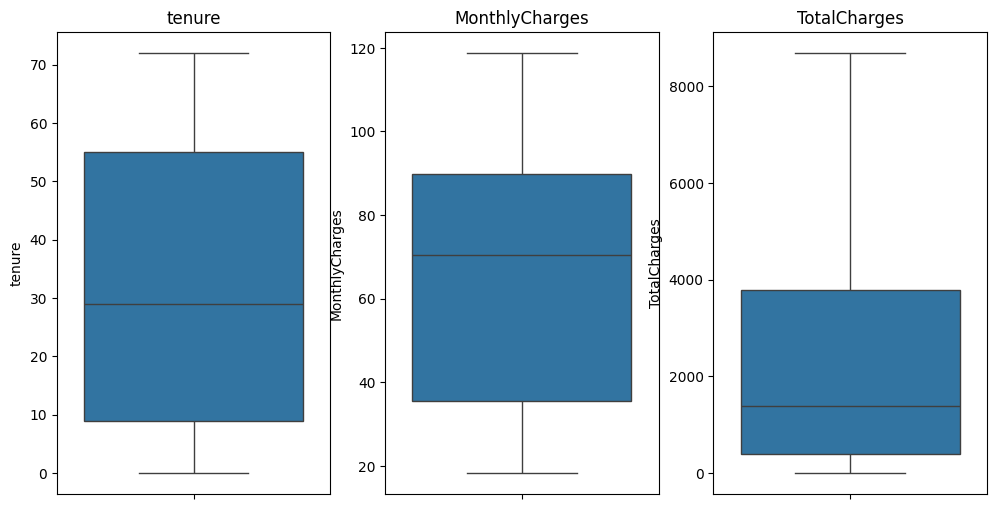

In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, len(outlier_columns), i)
    sns.boxplot(y=teleco_df[col])
    plt.title(col)

plt.show()


In [ ]:
outlier_values = {}

for i in outlier_columns:
    q1 = X[i].quantile(0.25) 
    q3 = X[i].quantile(0.75)

    ıqr = q3 - q1 

    lower_border = q1 - 1.5 * ıqr
    upper_border = q3 + 1.5 * ıqr

    Outliers= X[(X[i] < lower_border) | (X[i] > upper_border)]
    outlier_values[i] = Outliers 

    X = X[(X[i] >= lower_border) & (X[i] <= upper_border)]

    print(f"{i} columns: {len(Outliers)} values")

tenure columns: 0 values
MonthlyCharges columns: 0 values
TotalCharges columns: 0 values


#### Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.99327783, -0.44349351,  1.03725731, ...,  0.40564917,
         0.44113819, -0.36332672],
       [-1.00676766, -0.44349351,  1.03725731, ...,  0.40564917,
         1.53335395,  2.04588896],
       [ 0.99327783, -0.44349351,  1.03725731, ..., -0.52985121,
         0.57041411,  0.13495372],
       ...,
       [-1.00676766, -0.44349351, -0.96408094, ...,  0.40564917,
        -0.37429451,  0.41342587],
       [ 0.99327783, -0.44349351, -0.96408094, ...,  1.34114955,
        -0.32291562, -0.93858838],
       [ 0.99327783, -0.44349351, -0.96408094, ...,  1.34114955,
        -0.31960085, -0.06882139]], shape=(5634, 19))

In [ ]:
X_test_scaled

array([[ 0.99327783, -0.44349351,  1.03725731, ..., -1.46535159,
        -1.35049341, -0.34700802],
       [-1.00676766, -0.44349351,  1.03725731, ..., -1.46535159,
         1.18033125,  2.0798222 ],
       [ 0.99327783, -0.44349351, -0.96408094, ..., -0.52985121,
        -1.32894743, -0.86718583],
       ...,
       [-1.00676766,  2.25482444, -0.96408094, ...,  0.40564917,
         0.73615246, -0.69503781],
       [-1.00676766,  2.25482444,  1.03725731, ..., -1.46535159,
         1.1853034 ,  1.49006479],
       [ 0.99327783, -0.44349351,  1.03725731, ...,  0.40564917,
         0.500804  , -0.97335622]], shape=(1409, 19))

In [ ]:
X_test = pd.DataFrame(X_test_scaled , columns=X.columns)
X_train = pd.DataFrame(X_train_scaled , columns=X.columns)

In [ ]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.993278,-0.443494,1.037257,-0.652939,1.119412,0.325587,1.120598,1.528050,0.244604,0.105038,0.098929,0.231970,0.015441,0.005414,0.373139,-1.208413,-1.465352,-1.350493,-0.347008
1,-1.006768,-0.443494,1.037257,1.531537,1.567136,0.325587,1.120598,0.170158,1.407554,1.240900,1.234091,-0.927673,1.145223,-1.124251,1.571694,-1.208413,-1.465352,1.180331,2.079822
2,0.993278,-0.443494,-0.964081,-0.652939,-0.752890,0.325587,1.120598,1.528050,0.244604,0.105038,0.098929,0.231970,0.015441,0.005414,0.373139,0.827532,-0.529851,-1.328947,-0.867186
3,0.993278,-0.443494,1.037257,1.531537,-0.956401,0.325587,-0.987399,1.528050,0.244604,0.105038,0.098929,0.231970,0.015441,0.005414,1.571694,-1.208413,1.341150,-1.501315,-0.921786
4,0.993278,-0.443494,-0.964081,-0.652939,0.793794,0.325587,-0.987399,1.528050,0.244604,0.105038,0.098929,0.231970,0.015441,0.005414,1.571694,-1.208413,-1.465352,-1.454909,-0.522143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-1.006768,-0.443494,-0.964081,-0.652939,0.997305,-3.071373,0.066600,-1.187733,1.407554,-1.030824,1.234091,1.391612,-1.114342,-1.124251,0.373139,0.827532,-0.529851,-0.788640,-0.016527
1405,-1.006768,-0.443494,1.037257,1.531537,-0.997103,0.325587,-0.987399,-1.187733,-0.918347,1.240900,-1.036233,1.391612,-1.114342,-1.124251,-0.825416,-1.208413,-1.465352,-0.284796,-0.832132
1406,-1.006768,2.254824,-0.964081,-0.652939,-0.997103,0.325587,-0.987399,0.170158,-0.918347,1.240900,-1.036233,-0.927673,1.145223,-1.124251,-0.825416,0.827532,0.405649,0.736152,-0.695038
1407,-1.006768,2.254824,1.037257,-0.652939,0.956603,0.325587,1.120598,0.170158,-0.918347,-1.030824,1.234091,-0.927673,1.145223,1.135078,-0.825416,0.827532,-1.465352,1.185303,1.490065


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.993278,-0.443494,1.037257,-0.652939,-0.590081,0.325587,-0.987399,0.170158,-0.918347,-1.030824,1.234091,1.391612,-1.114342,-1.124251,-0.825416,-1.208413,0.405649,0.441138,-0.363327
1,-1.006768,-0.443494,1.037257,-0.652939,1.282221,0.325587,1.120598,0.170158,-0.918347,1.240900,1.234091,1.391612,1.145223,1.135078,-0.825416,0.827532,0.405649,1.533354,2.045889
2,0.993278,-0.443494,1.037257,1.531537,0.020452,0.325587,-0.987399,-1.187733,-0.918347,1.240900,1.234091,1.391612,1.145223,1.135078,1.571694,-1.208413,-0.529851,0.570414,0.134954
3,0.993278,-0.443494,-0.964081,-0.652939,-1.200614,0.325587,-0.987399,0.170158,-0.918347,1.240900,-1.036233,-0.927673,-1.114342,1.135078,-0.825416,-1.208413,0.405649,0.643339,-0.905248
4,0.993278,-0.443494,-0.964081,-0.652939,1.282221,0.325587,1.120598,0.170158,-0.918347,1.240900,-1.036233,1.391612,1.145223,1.135078,0.373139,0.827532,-0.529851,1.351042,2.023794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,-1.006768,-0.443494,-0.964081,-0.652939,-1.159912,0.325587,1.120598,0.170158,-0.918347,1.240900,-1.036233,-0.927673,-1.114342,-1.124251,-0.825416,0.827532,1.341150,0.510748,-0.866088
5630,-1.006768,-0.443494,1.037257,1.531537,-0.386570,0.325587,1.120598,-1.187733,1.407554,1.240900,1.234091,1.391612,1.145223,1.135078,1.571694,0.827532,-0.529851,0.868743,-0.042861
5631,-1.006768,-0.443494,-0.964081,-0.652939,1.119412,-3.071373,0.066600,-1.187733,1.407554,-1.030824,1.234091,-0.927673,1.145223,1.135078,1.571694,-1.208413,0.405649,-0.374295,0.413426
5632,0.993278,-0.443494,-0.964081,-0.652939,-1.200614,0.325587,-0.987399,-1.187733,-0.918347,-1.030824,-1.036233,-0.927673,1.145223,-1.124251,-0.825416,-1.208413,1.341150,-0.322916,-0.938588


#### Model Oluştuma / Model Building

In [ ]:
logreg = LogisticRegression()

In [ ]:
param_grid = {
    "C" : np.logspace(0,5,15) , 
    "penalty" : ["l1" , "l2"] , 
    "solver" : ["liblinear" , "saga"] , 
    "max_iter" : [100 , 150 , 200]
 }

In [ ]:
grid_model = GridSearchCV(
    estimator= logreg , 
    param_grid = param_grid ,
    cv = 5 , 
    n_jobs= 5 , 
    verbose= 1 
)

In [ ]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=5,
             param_grid={'C': array([1.00000000e+00, 2.27584593e+00, 5.17947468e+00, 1.17876863e+01,
       2.68269580e+01, 6.10540230e+01, 1.38949549e+02, 3.16227766e+02,
       7.19685673e+02, 1.63789371e+03, 3.72759372e+03, 8.48342898e+03,
       1.93069773e+04, 4.39397056e+04, 1.00000000e+05]),
                         'max_iter': [100, 150, 200], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

#### Predict

In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
print("Model Doruluk Oranı" , (round(accuracy_score(y_test,y_pred) * 100 , 2)))

Model Doruluk Oranı 80.7


#### Coef

In [ ]:
coef = pd.Series(index=X.columns , data=grid_model.best_estimator_.coef_[0])

In [ ]:
coef

gender             -0.013769
SeniorCitizen       0.088759
Partner            -0.008316
Dependents         -0.049362
tenure             -1.348284
PhoneService       -0.336031
MultipleLines       0.075032
InternetService     0.168550
OnlineSecurity     -0.239637
OnlineBackup       -0.104099
DeviceProtection   -0.111150
TechSupport        -0.222099
StreamingTV        -0.033093
StreamingMovies     0.007074
Contract           -0.585725
PaperlessBilling    0.183173
PaymentMethod       0.041631
MonthlyCharges      0.701455
TotalCharges        0.631349
dtype: float64

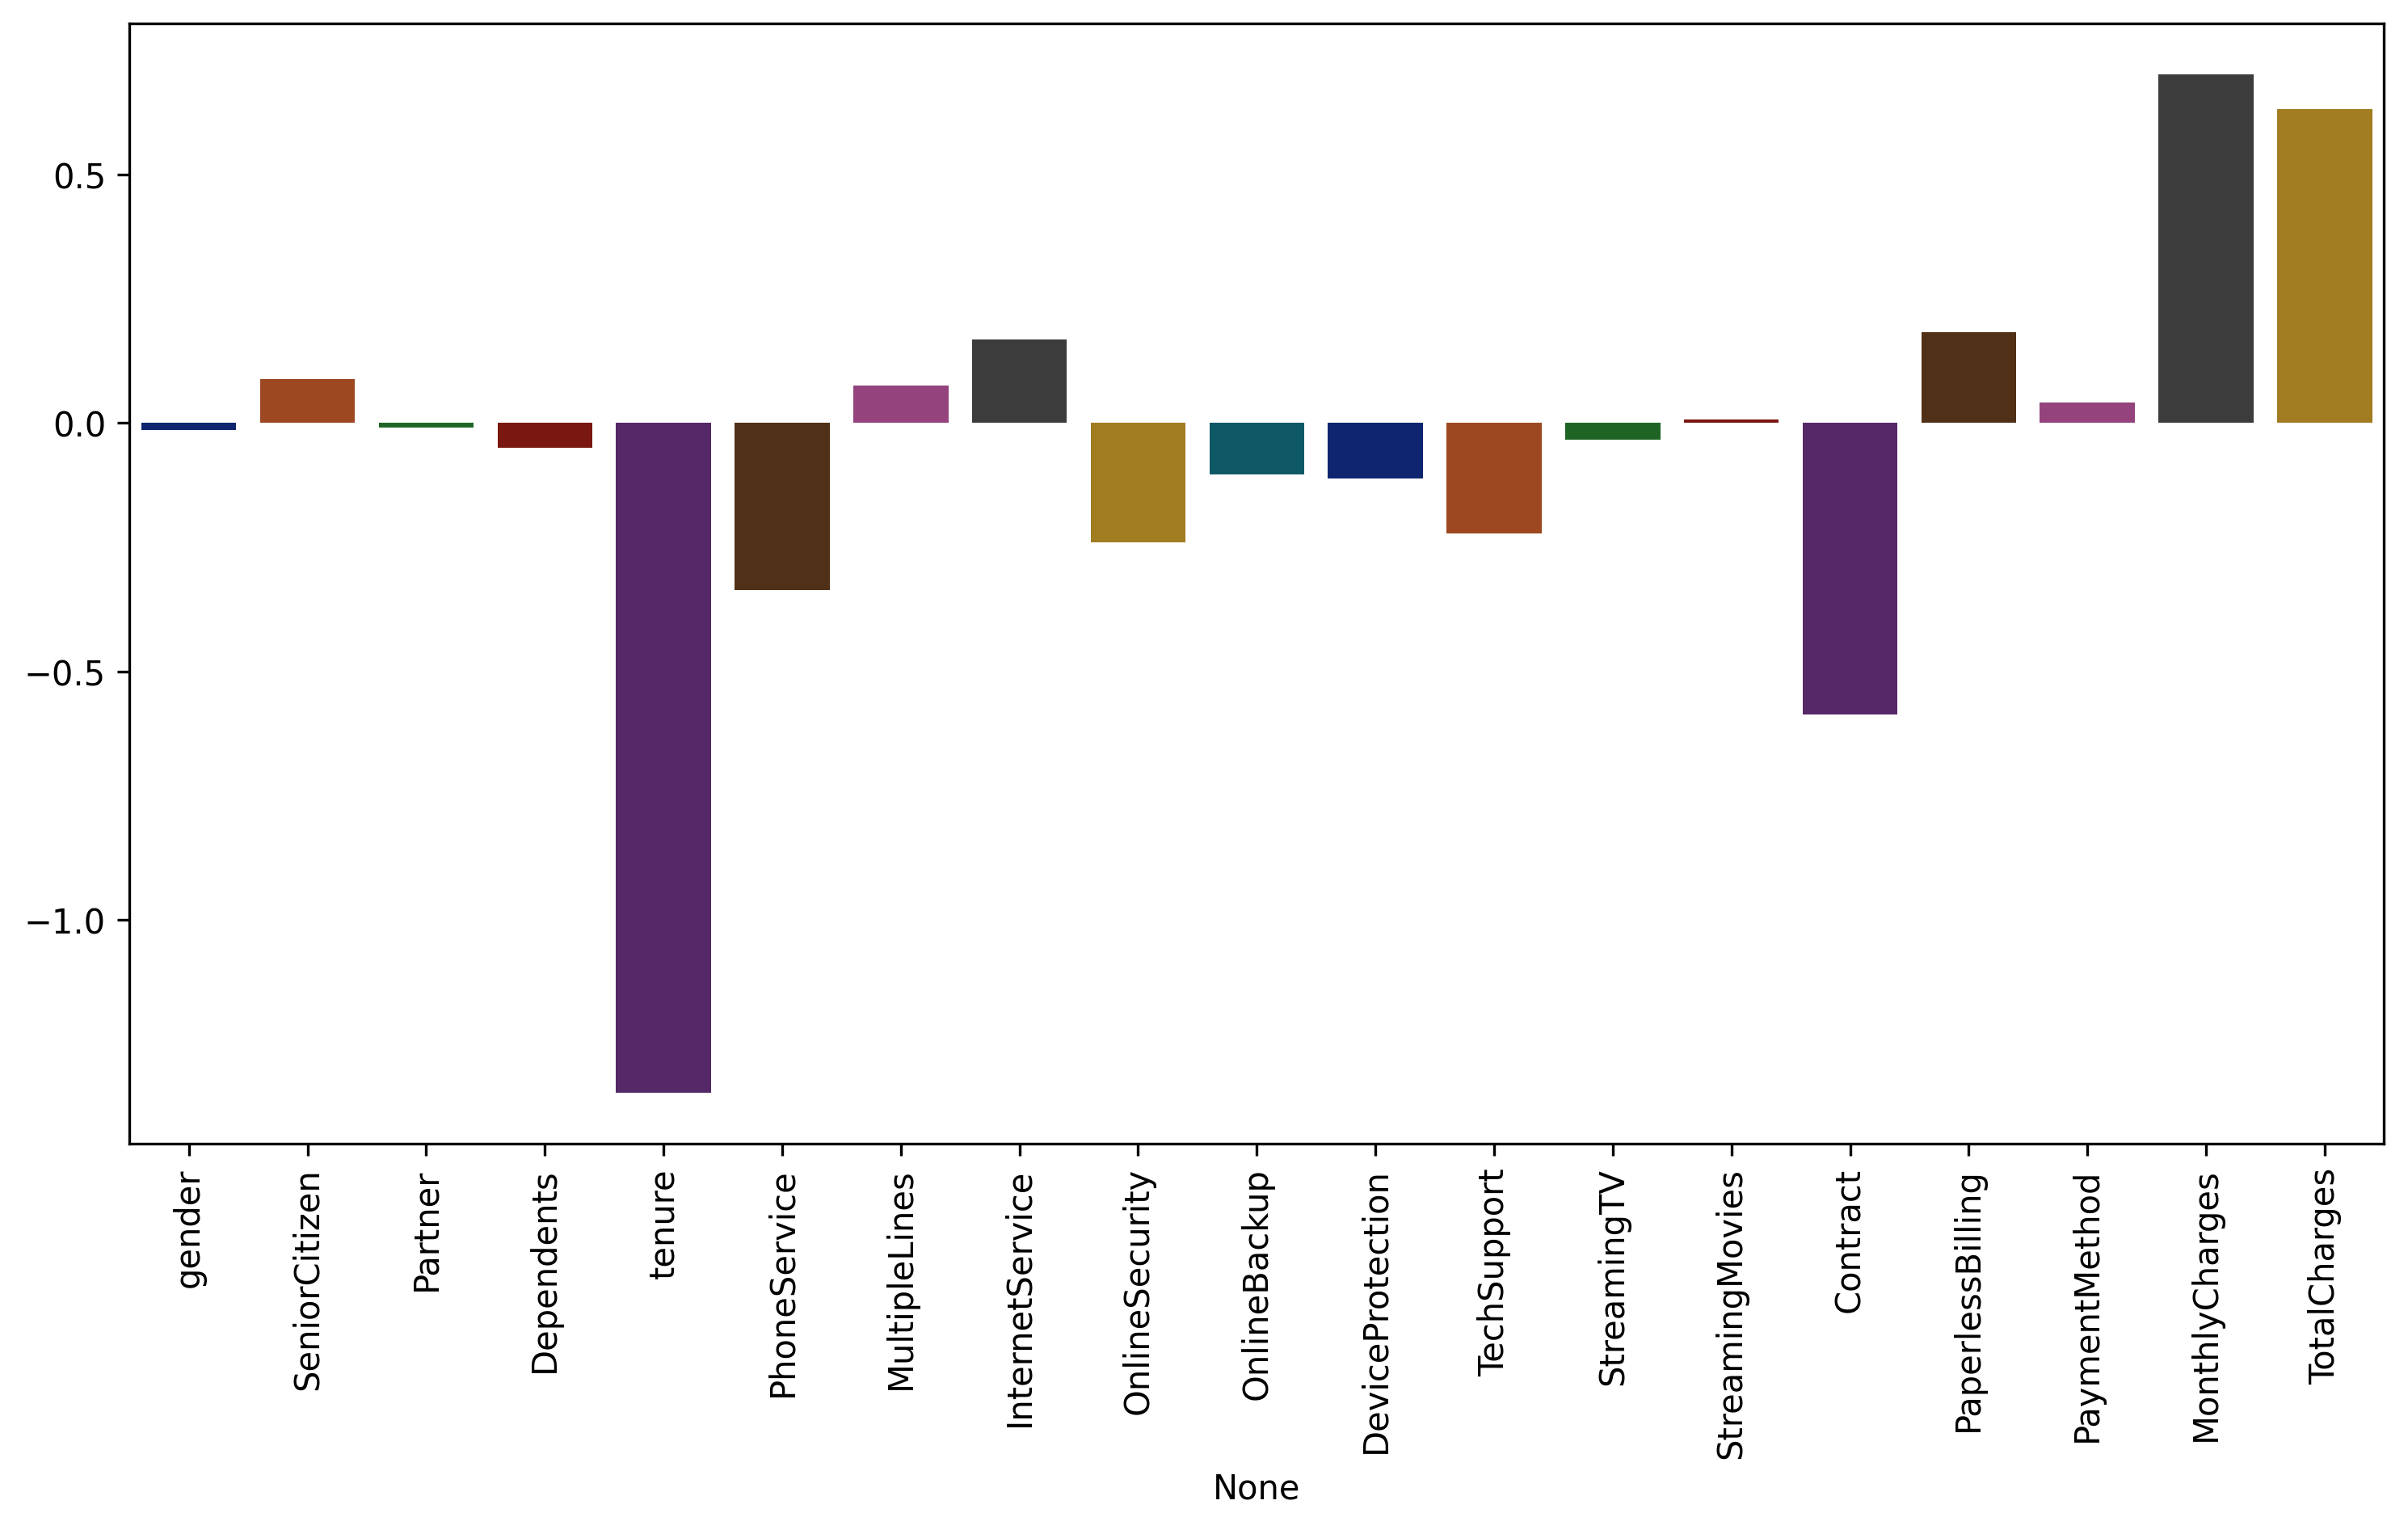

In [ ]:
plt.figure(figsize=(12,6) , dpi=300)
sns.barplot(x=coef.index , y=coef.values , color="#697565" , palette="dark") 
plt.xticks(rotation = 90)
plt.show()

#### Metrics

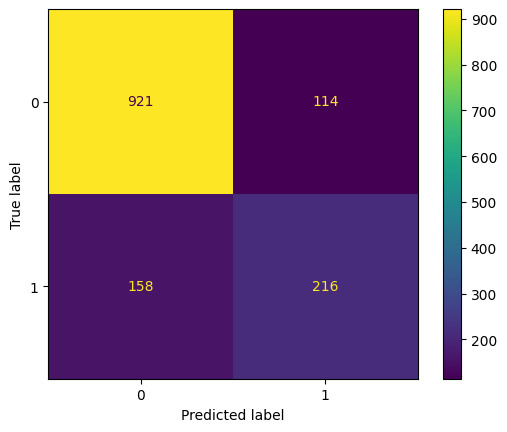

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_model , X_test , y_test)

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



#### Stats Model

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [ ]:
X_train_const = sm.add_constant(X_train)

sm_model = sm.Logit(y_train , X_train_const)
sm_result = sm_model.fit()

print(sm_result.summary())

Optimization terminated successfully.
         Current function value: 0.418881
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5614
Method:                           MLE   Df Model:                           19
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.2760
Time:                        17:51:58   Log-Likelihood:                -2360.0
converged:                       True   LL-Null:                       -3259.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7140      0.058    -29.436      0.000      -1.828      -1.600
gender     